In [15]:
# Importing libraries 
from keras.datasets import imdb
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%mathplotlib inline

ImportError: cannot import name 'should_run_validation' from 'keras.engine.training_utils' (C:\Users\VisualBI\Anaconda3\lib\site-packages\keras\engine\training_utils.py)

In [16]:
# Split data set 
top_words = 50000
x_train, y_train,x_test, y_test = imdb.load_data(num_words = top_words)
x_train[0]
y_train[0]

NameError: name 'imdb' is not defined

In [17]:
imdb.get_word_index()

NameError: name 'imdb' is not defined

In [6]:
## output review sentences 
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))


> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [9]:
print(word_dict[id] for id in x_train[0])

<generator object <genexpr> at 0x7fe4ed7aa620>


In [10]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 23s 930us/step - loss: 0.5621 - acc: 0.6664 - val_loss: 0.3304 - val_acc: 0.8556
Epoch 2/5
25000/25000 [==============================] - 22s 868us/step - loss: 0.2055 - acc: 0.9207 - val_loss: 0.2857 - val_acc: 0.8809
Epoch 3/5
25000/25000 [==============================] - 23s 901us/step - loss: 0.0677 - acc: 0.9818 - val_loss: 0.3488 - val_acc: 0.8714
Epoch 4/5
25000/25000 [==============================] - 23s 936us/step - loss: 0.0156 - acc: 0.9975 - val_loss: 0.4231 - val_acc: 0.8702
Epoch 5/5
25000/25000 [==============================] - 23s 901us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.4694 - val_acc: 0.8698


[]

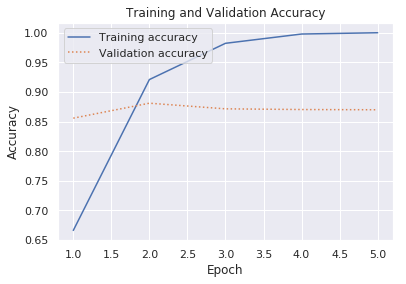

In [13]:
sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

[]

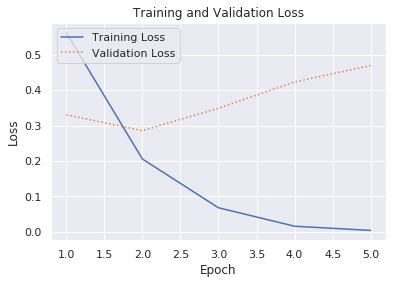

In [14]:

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.plot()

In [15]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))


Accuracy: 86.98%


In [20]:
import string
import numpy as np

def analyze(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [23]:
analyze('It is sad.')


0.55970347

In [24]:
analyze('I cry.')

0.8922292

In [25]:
analyze('life is hard.')

0.7588535

In [28]:
analyze("this store's service makes me wanna die")

0.19594647

In [ ]:
analyze('the main lead sucks!!')